Available at http://www.comp.nus.edu.sg/~cs3244/1910/05.colab

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/1910/img/banner-1910.png)
---
See **Credits** below for acknowledgements and rights.  For NUS class credit, you'll need to do the corresponding _Assessment_ in [CS3244 in Coursemology](http://coursemology.org/courses/1677) by the respective deadline (as in Coursemology). 

**You must acknowledge that your submitted Assessment is your independent work, see questions in the Assessment at the end.**


**Learning Outcomes for this Week**

After finishing the in-class exercises and post-class videos, you should be able to understand:
*  The basic concepts of bias and variance;
*  The tradeoff between bias and variance;
*  The basic concepts of under- and overfitting.


_Welcome to the Week 05 Python notebook._ This week we will learn about bias and variance.  We also introduce overfitting and underfitting in the lecture videos, and will be reviewing this material in the fourth tutorial.


In this notebook, we will go through bias, variance and overfitting concepts in the Pre-tutorial part, and look at noise and apply these concepts to kNN Regression in the Post-tutorial part. 

---
# Week 05: Pre-Tutorial Work

Watch the videos for Week 5 Pre. This week, we will learn three new topics: **Bias**, **Variance** and **Overfitting**.   These will give us the tip of the iceberg  towards the understanding of machine learning theory.  There'll be less to apply this week, so there'll be more time to work with your project group to start to formulate a project you'd like to work on. 

## 1 Introduction


Up to now, we have seen a few simple yet important machine learning algorithms. 

In supervised learning we learnt that our goal was to learn a target function $f$ (or _distribution_, in the case of a noisy target) from the given dataset. By choosing a hypothesis $h_\theta$, we attempt to replicate the target function as best as we can. We try to do this through the lens of the samples we are provided via the training dataset, hoping that our hypothesis will hold up well on unseen, future data.  Often, we can't do that exactly; i.e., we have nonzero test error – $J_{test}$.  

In machine learning, we attempt to find the best selection of $h_\theta$; i.e., the best selection of the  parameter weights $\theta$ for our hypothesis family $\mathcal{H}$, to best approximate the target function. How can we do better? 

##  2 Bias and Variance

### .a Intro

> _Aside_.  Let's play a guessing game.  I'm thinking of a number between $1$ and $10$.  Go ahead.  I will give you one guess.  Pick a number.  Tell me your number ...

> Aww, good try, but you didn't guess it.  Let's play again.  I'm thinking of another number between $1$ and $10$ again.  Go ahead, but this time I will give you two guesses, and tell you at the end of the two numbers you selected, whether you guessed my number.  Ok, tell me the two numbers ... Aww, good try, but you still didn't get it.

> Third time's the charm -- one more time.  I'm thinking of another number between $1$ and $10$ (I might pick one of the numbers I picked before).  Ok, now I'm feeling generous.  I'll give you $10$ tries.  Did you get it?  Wow, you did -- great job! 

> Hey, so remind me, which number was it that I selected on the third time?  You don't know?  But you found my number right?

We see from this story that there is a concept of the tradeoff between the _number of guesses_ and being certain about the _actual number_.  The larger the number of guesses I give you, the higher the probability you can guess my number, but the lower the probability you can discern the number itself from your guesses.

This tradeoff is similar to the tradeoff between **bias** and **variance**, a key notion in machine learning for understanding the importance of model representation (or equivalently the expressiveness of the hypothesis set $\mathcal{H}$).  Replace _my number_ with _target function_, and the _number of guesses_ with _your hypothesis set_ and the analogy comes close.


Ok, back to the world of ML.  For simplicity, for the rest of this notebook, we'll just think of the _univariate_ case, where we have a single input variable $x$.  

Now, given a training dataset, we try to learn the target function by selecting a particular learning algorithm $\mathcal{A}$ that can choose hypotheses from a fixed collection of hypotheses $\mathcal{H}$.  Such a collection is fixed, but often infinite in size: e.g., a linear system of $y=\theta_0 + \theta_1x$, having only an intercept (bias$\color{red}{^1}$) term $\theta_0$ and $\theta_1$ can draw an infinite number of lines in the $(x,y)$ plane, but they can only be straight lines.  Such a simple hypothesis set is limiting; since there's no way we can match a target function that is any more complicated; e.g., a quadratic target function.  By right, if we wanted to learn a quadratic target function, we'd have to have, at a minimum, the capability to represent a quadratic term; perhaps using a hypotheses set represented by $y=\theta_0 + \theta_1x + \theta_2x^2$.  This latter set is more expressive; it subsumes the first hypotheses set when we set $\theta_2 = 0$.  But the latter set is also larger, so finding the best fit hypothesis for a target function within the hypothesis set is also more difficult.  

($\color{red}{^1}$ the use of "bias" here is not the same as that used for our current discussion of _bias and variance_, although related.)

### .b Bias

Let's do a thought experiment, staying within the univariate case.  Assume for a minute that we have a single hypothesis in our hypothesis set (e.g., $y=1$ or $y=3x^2-x+5$ or any other single hypothesis). 

What can we do with this single hypothesis? Well then, we can only use this hypothesis to approximate the target function.  Whether it does a decent job or is a poor fit, we don't have any choice.  Probably it won't represent the target function well, so we'll say there's a gap between the representation of the target function and our hypothesis:

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/pic1.png" width=350 />
 </div>
 
*(Diagram credit: Neamul Kabir, NUS; CC BY 4.0)*



In the picture, we have a hypothesis set $\mathcal{H}$ (the green set), where we only have a single hypothesis (blue circle), and the target function (red square) is not close to the hypothesis. From the picture, we can see that, there is a gap between the hypothesis (circle) and the target function (square). But we don't have other hypotheses to try, so we have to return this hypothesis. The gap between hypothesis and the target function is called the **bias**. This gap indicates that our learned hypothesis is not as good as the actual target function. In ML, we want to minimize this representation gap as much as possible, so as to mimic the target function's values on the training data well.  

Said another way, we want to _approximate_ the values on our training dataset with as much fidelity as possible; $min (J_{train})$.

**Your Turn (Question 1)**: How does bias affect learning?

_Replace with your answer_

### .c Variance

To improve this situation (minimize bias), we can enrich our hypothesis set by increasing the representative power of our hypotheses set $\mathcal{H}$ to include more possible hypotheses to choose from.  How does the learning algorithm $\mathcal{A}$ choose which hypothesis to return from the set $\mathcal{H}$?  It is based on what the learning algorithm sees from the training data – i.e., it  selects the hypothesis $h_\theta$ that best represents the training data.

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/pic2.png" width=450 />
 </div>
 
_(Diagram credit: Neamul Kabir, NUS; CC BY 4.0)_

In this second picture, we can see that our hypotheses set (green outline) has been enlarged to have multiple possible choices: i.e., different parameterizations in our choice of $\theta$, resulting in different $h_\theta$s (blue circles).  

In this example, the target function (red square) happens to a member of the set $\mathcal{H}$.  So there is a possibility that there is no cost due to bias, because there is a possibility that the learner chooses $h_\theta = f$.  As there are more hypotheses, our ML algorithm $\mathcal{A}$ will choose one based on the training data it sees.  The resulting set is illustrated in the picture by the orange colored region, where the training data is consistent with a number of hypotheses in the hypotheses set.  As we enrich our model representation by admitting a larger number of hypotheses, generally speaking there is a greater chance of matching the  target function, but it also becomes more difficult to find the actual target function $f$ due to the possible variations in fitting the best hypotheses, because of the sampled observations that make up our dataset.  



Here it is important to understand that the training dataset is a "lens" through which we see the target function.  We never get to see the actual function, but only get a glimpse of its value at certain points, the points provided in the training dataset.  Depending on which part of the target function is revealed through the samples in the dataset, the variability in the possible choices of $\theta$ could lead us to different hypotheses.  

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Blind_men_and_elephant.png/520px-Blind_men_and_elephant.png" width=450 />
 </div>
 
_(Diagram credit: Martha Adelaide Holton & Charles Madison Curry, Holton-Curry readers, Rand McNally & Co. (Chicago), p. 108. Public domain image via Wikimedia)_




**Your Turn (Question 2)**: What is the analogous concept to the **blind men** in our ML example?

Answer: Learner Instances Exposed to Different Training Datasets_
In the picture, the blind men are trying to guess the elephant. Each men symbolizes an learning instance and the part of the elephant he touches is the training data.

This form of cost is called the **variance**: the fluctuation of the possible choices of the hypothesis within the set that are consistent with the varying observations of the training data.  We also want variance to be minimized to best match the actual target function.

With more expressive hypotheses sets, we have the ability to fit nuances of the training data better, but these could be particular to the training data samples that we observe, and not the regularities represented by $f$ that we actually want to capture. 

Said another way, we want our hypothesis to _generalize_ well; we don't want it to fluctuate too much based on the particular dataset samples that we happen to get in the training dataset.  If it does, we may end up with poor performance on new, unseen test data.

**Your Turn (Question 3)**: How does variance affect learning?

_Replace with your answer_

### .d Bias–Variance Tradeoff

 Our ultimate goal is to predict the target function $f$, i.e., to ensure that the hypothesis chosen reflects the target function on unseen test data: $min (J_{test})$.  Then, there is a tradeoff between **_bias_** and **_variance_** sources of cost.

We summarize this _bias–variance tradeoff_ as follows:
* Less complex $\mathcal{H}$ :  More cost due to bias, but less variability in the  possible hypotheses, hence better generalization. Less cost due to variance. 
* More complex $\mathcal{H}$ :  Less cost due to bias, as we can approximate the training data more accurately.  There is more cost due to variance, as the enhanced expressiveness of the hypothesis set could lead us to capture patterns specific to the training data sampling. 

This tradeoff is also know as the _approximation–generalization_ tradeoff.  

## 3 Under- and Overfitting

Understanding the bias–variance tradeoff is great, but what can we do about it practically?

**Possible solution**: we need to choose a hypothesis set that makes an appropriate choice on the expressiveness of the dataset.  

When we apply ML, we try to fit the data using our hypothesis.  In doing this, we can make two different type of errors named: _underfitting_ and _overfitting_.  

* **Underfitting:** It means that hypothesis performs badly on approximation. It cannot fit the training data well (and won't generate good predictions on the testing data either), because the hypothesis set lacks enough expressiveness; i.e., it has a high bias.

* **Overfitting:** This means that the hypothesis set is overly expressive. It captures not only the underlying pattern of $f$, but also the pattern specific to the sampled training data; i.e., it has a high variance.

We should choose a hypothesis set thus based on the quality of the training data.  We'll see this idea in the Week 5 post videos.

**Your Turn (Question 4)**: Which is a possible cause for underfitting?

Answer:  Having very little training data
If we have only few training examples, then we cannot learn the target function perfectly, which may cause the underfitting. Underfitting could also happen when a machine learning model isn’t complex enough to accurately capture relationships between a dataset’s features and a target variable. You may have seen some examples in the in class material and the colab notebook.

Consider again the problem of univariate regression (e.g., predicting a person's credit line $y$ from the single variable of salary $x$).  

If we choose a hypothesis set $\mathcal{H_0}: y=\theta_0$, we won't capture the dataset well (i.e., we give everyone the same credit line, say $1,000$ dollars, regardless of their salary).  This is _underfitting_.

If we choose an overly expressive hypothesis set of 4th order polynomials – i.e., $\mathcal{H_4}: y=\theta_4x^4+ \theta_3x^3 +\theta_2x^2+ \theta_1 x+\theta_0$, we can get a better fit to the training data. But it may also capture the particularities of the training data that don't generalize to other cases.  For example, let's assume we have a training set, where we have 5 data points (circles). If we use a fourth order polynomial ($ax^4 + bx^3 + cx^2 + dx + e = 0$) to fit these five points, we can fit the training data perfectly ($J_{train} = 0$).

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/pic3.png" width=350 />
 </div>
 


In the above figure, the circles indicate training samples and the curve is our $4$th order polynomial hypothesis. After training, we got this result from our algorithm.

What happens, when we test our hypothesis on unseen data? Let's look at the figure below. When we apply our hypothesis on new unseen test data (stars) in the left diagram, the performance is very poor (in particular, the last rightmost star might have a predicted value in the negative).  

Instead, perhaps we should have restricted our hypothesis set to $\mathcal{H_2}$ for 2nd order polynomials like that in green on the right diagram.  We would have gotten a higher cost from our bias, but we would have less cost due to variance. 

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/pic7.png" width=700 />
 </div>

Great job trying to understand these concepts.  Having a good understanding about the _bias–variance tradeoff_ is one of the key differentiators between people who understand ML and those who just use ML.  Having a good understanding will allow you to make smarter decisions about what to do when applying ML doesn't yield what you expect.  

You're ready now for some more exploration of this concept (and time to come up with your group project proposal).

## 4 Example: Learning a Sine function

Now, we are going to experience _bias_ and _variance_ firsthand. We will see a few simulations of _bias_, _variance_ and _overfitting_, and try to observe the impact of different parameters.

In [5]:
# Our standard library imports.  Make sure to run this block first
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from autograd import grad
import autograd.numpy as grad_np

### .a Code for animating the plots  

This code block helps to get the animations working within the colab framework.  While you're welcomed to study it, it doesn't really pertain to the phenomenon at hand; it's just to make the visualization more appealing.  

You can run it once to initialize things appropriately and then you can ignore it – we recommend that you fold away this Section 4.a after running.

In [6]:
# Here we define the coordinates for our plots and set up the points 
x = np.linspace(-4, 4, 100)

def init():
    """ Initialization function: plot the background of each frame

    Args: No arguments

    Returns: No returns
    """
    # Set the limits of the plots
    ax1.set_xlim(( -np.pi, np.pi))
    ax1.set_ylim((-2, 2))
    ax2.set_xlim(( -np.pi, np.pi))
    ax2.set_ylim((-2, 2))
    # Compute the values of the target function
    y = targetFunction (x)
    y[0],y[-1] = 100,100 # This is a bit of an hack, to avoid that the plot draws a line from the beginning to the end of the plot
    sin_plot1.set_data(x, y)  
    sin_plot2.set_data(x, y)  
    # Set the title and legend of each plot here 
    ax1.legend()
    ax2.legend()
    ax1.set_title("H0")
    ax2.set_title("H1")
    return (sin_plot1,dots_plot1,)

# animation function: this is called sequentially
def animate(i):
  """
    i: the framenumber

    Returns: an object representing the plot for this frame
  """
  x[0] = x[-1] # We need to make the x vector a loop, otherwise we get lots of ugly lines in the plot
  # The animation is done in three steps
  if(i % 3 == 0): # First, we create new sample points
    for _ in range(numberOfSamplePoints):
      xdots.append(random.uniform(-np.pi,np.pi))
    dots_plot1.set_data(xdots[-numberOfSamplePoints:], targetFunction(xdots[-numberOfSamplePoints:]))
    dots_plot2.set_data(xdots[-numberOfSamplePoints:], targetFunction(xdots[-numberOfSamplePoints:]))
    return (dots_plot1,dots_plot2,)
  elif(i % 3 == 1): # Then, we create the current hypothesis
    h0 = np.poly1d(np.polyfit(xdots[-numberOfSamplePoints:],targetFunction(xdots[-numberOfSamplePoints:]),0))
    lines1.append(h0(x))
    h1 = np.poly1d(np.polyfit(xdots[-numberOfSamplePoints:],targetFunction(xdots[-numberOfSamplePoints:]),1))
    lines2.append(h1(x))
    newline_plot1.set_data(x, h0(x))
    newline_plot2.set_data(x, h1(x))
    return (newline_plot1, newline_plot2 )
  else: # Finally, we update the hold hypothesis and the average hypothesis
    lines_plot1.set_data(np.tile(x,len(lines1)), np.asarray(lines1).ravel())
    lines_plot2.set_data(np.tile(x,len(lines2)), np.asarray(lines2).ravel())
    average_plot1.set_data(x, np.asarray(lines1).mean())
    average_plot2.set_data(x, np.asarray(lines2).mean(axis=0))
    return (lines_plot1, lines_plot2,)

### Code for experiments

Now we will try to visualize _bias_ and _variance_ through this experiment. In this experiment, we want to learn the `sin` function from only $3$ data points (you are encouraged to change the `numberOfSamplePoints` later). 

Run the code block below and then run the simulation to observe bias and variance.

In [7]:
### You can run different experiments by changing these four parameters ###
numberOfSamplePoints = 3
targetFunction = np.sin
numberOfFrames = 20 
timeIntervalBetweenFrames = 500 # time in ms
###############################################

# This code block resets the plots every time (so the plots don't overlap)
# You can ignore this part
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 6))
plt.close()
sin_plot1, = ax1.plot([], [], lw=2, label="Target")
sin_plot2, = ax2.plot([], [], lw=2, label="Target")
dots_plot1, = ax1.plot([], [], lw=2, color='blue', marker="o", ls="None", label="Current samples")
dots_plot2, = ax2.plot([], [], lw=2, color='blue', marker="o", ls="None", label="Current samples")
lines_plot1, = ax1.plot([], [], lw=2, color='black', alpha=0.1, label = "Old fits")
lines_plot2, = ax2.plot([], [], lw=2, color='black', alpha=0.1, label = "Old fits")
newline_plot1, = ax1.plot([], [], lw=2, label = "Current fit")
newline_plot2, = ax2.plot([], [], lw=2, label = "Current fit")
average_plot1, = ax1.plot([], [], lw=2, label = "Average fit")
average_plot2, = ax2.plot([], [], lw=2, label = "Average fit")
xdots, lines1, lines2 = [], [], []

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=numberOfFrames, interval=timeIntervalBetweenFrames, blit=True)

rc('animation', html='jshtml')
anim

In this experiment, we have only $3$ points from the target distribution (`numberOfSamplePoints` $= 3$) and we try to fit those points using two hypotheses. We can see the bias and variance from the simulation. Try running the code a few times and observe how it changes.  Then change the number of points, observe the changes and answer the questions below.

**Your Turn (Question 5)**: How will the bias be affected by increasing the number of points?

Answer: The bias will remain unchanged
Bias is not affected by the number of points. If we do not change the hypothesis function, the bias remains the same. It doesn't matter if we have many points or only a few.

**Your Turn (Question 6)**: How will the variance be affected by increasing the number of points?

Answer: _The variance will go down
If we increase the number of points, variance will decrease. The reason is quite simple. If we have many points, the hypotheses are going to be quite near to one another while trying to fit all those points. The experiment shows this result if you observe carefully.

## 5 Overfitting

Let's next consider the problem of _overfitting_, i.e. the problem of having good performance on the training data (low $J_{train}$), but not generalizing well beyond the training data (high $J_{test}$).

As an example, let's approximate a polynomial with another polynomial. We will use [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) for the underlying function as well as the learner. While approximation with Legendre polynomials is interesting, we will let Python take care of the optimization and only look at the results.

At the beginning of the following code block, there are four variables:

* `targetOrder` - the order of the polynomial (_target function_) we are trying to learn;
* `approximationOrder` - the order of the polynomial (_hypothesis_) we are using to learn; 
* `noiseLevel` - the variance of the noise we are adding to the data ($0$ means no noise, $10$ means quite a lot of noise)
* `numberOfSamples` - the number of samples we use for training.

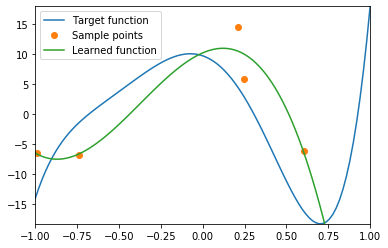

In [9]:
####### you have to change the parameters later ######
# Parameters
targetOrder = 6
approximationOrder = 3
noiseLevel = 10
numberOfSamples = 5
######################################################

x = np.linspace(-1, 1, 100)
# We generate a random polynomial of the given order
target_coefficients = [random.randint(-20,20) for i in range(targetOrder)]
target = np.polynomial.legendre.Legendre(target_coefficients)

# We uniformly sample data points and add Gaussian noise
data_x = [2*random.random()-1 for i in range(numberOfSamples)] 
data_y = [target(x) + random.gauss(0,noiseLevel) for x in data_x]

# We fit a Legendre polynomial of the given order to the data
learner = np.polynomial.legendre.Legendre.fit(data_x,data_y,approximationOrder)

# We plot everything
fig, ax = plt.subplots()
ax.set_xlim((-1, 1))
ax.set_ylim((target(x).min(), target(x).max()))
plt.plot(x,target(x),label="Target function")
plt.plot(data_x,data_y,"o",label="Sample points")
plt.plot(x,learner(x),label="Learned function")
ax.legend()

**Your Turn**: You have seen the parameter setting at the beginning of this code block. Now, for $targetOrder = 6$, $noiseLevel = 2$, $numberOfSamples = 5$; change the value of the parameter $approximationOrder$ to get an example of underfitting and overfitting from the given code snippet. Try to run the expermient a few times for one parameter setting. 

**Your Turn (Question 7)**: Write down the value of approximationOrder for an example of underfitting.

_Replace with your answer_

**Your Turn (Question 8)**: Write down the value of approximationOrder for an example of overfitting.

_Replace with your answer_

**Your Turn (Question 9)**: For the parameter values of $targetOrder = 6$, $approximationOrder = 3$, $numberOfSamples = 5$, change the value of $noiseLevel$ and try to see the impact of $noiseLevel$ on the target function.
What is the impact of noiseLevel on target function for the given parameter settings?

Yep, the target function is of course not affected by noise. The learned function can be affected in many different ways. 

---
# Week 05: Post-Tutorial Work



Watch the week $05$ post videos on the lecture topics introduced this week. After watching the videos, please go through the following sections and answer the questions.  

## 6 Overfit Measure

We've seen how curves are fitted in the lectures and the overfitting section above. Now, let us look at how the performance of the fitted curve depends on the _number of training examples_ and the _model complexitity_ in our hypothesis space.

Let us consider the following target function:

$$f(x) = 3 - 2x + x^2 + 4x^4 + 9x^5$$

We will randomly sample points from  $f(x)$ and train a polynomial function  $h(x)$  using these training examples. We shall learn by minimizing the mean squared error of the fitted curve using gradient descent.

In the following code blocks, we calculate the `training loss` and `expected loss` for our hypothesis function. _You don't need to worry about the code below. The resultant plot is what's important._  

So just run the following code blocks!


In [10]:
# Our standard library imports.  Make sure to run this block first
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from autograd import grad
import autograd.numpy as grad_np

In [11]:
actual_weights = grad_np.array([3, -2, 1, 0, 4, 9]) # Actual weights (coefficients) of the target function f(x)

def polynomial(weights, x):
    x = x.reshape(len(x), 1)
    powers_of_x = x ** grad_np.arange(len(weights))
    return grad_np.dot(powers_of_x, weights) 

# Returns the mean squared error for the given hypothesis
def training_loss(weights):
    predicted_y = polynomial(weights, sample_x)
    return grad_np.sum((predicted_y - sample_y) ** 2) / len(predicted_y)

training_loss_grad = grad(training_loss)

In [12]:
n_iterations = 30 # Number of iterations used to calculate the average losses
max_points = 30 # Number of points in the training set
fit_degree = 5 # Degree (order) of the hypothesis function

training_losses = grad_np.zeros(max_points)
expected_losses = grad_np.zeros(max_points)

grad_np.random.seed(0)

x = grad_np.linspace(-1, 1, 500)
y = polynomial(actual_weights, x)

for num_points in range(1, max_points + 1):
  
    training_loss = 0.0
    expected_loss = 0.0

    for i in range(n_iterations):
        # generate random samples for training
        sample_x = grad_np.random.uniform(low=-1, high=1, size=num_points)
        sample_y = polynomial(actual_weights, sample_x)

        weights = grad_np.random.normal(scale=10, size=fit_degree+1)
        learning_rate = 0.1

        # train with samples
        for j in range(100):
            weights = weights - learning_rate * training_loss_grad(weights)
    
        training_loss += grad_np.sum((polynomial(weights, sample_x) - sample_y) ** 2) / len(sample_x)
        expected_loss += grad_np.sum((polynomial(weights, x) - y) ** 2) / len(x)
  
    training_losses[num_points - 1] = training_loss / n_iterations
    expected_losses[num_points - 1] = expected_loss / n_iterations


The code below plots the _training loss_ and _expected loss_ with respect to the number of training examples. 


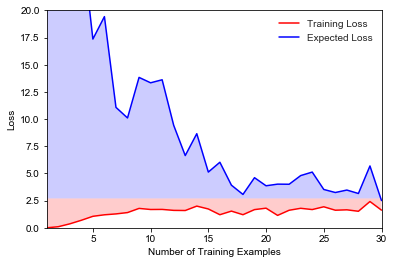

In [13]:
fig, ax = plt.subplots()

plt.style.use('seaborn-white')
plt.xlim(1, 30)
plt.ylim(0, 20)
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1, max_points + 1), training_losses, 'r', label='Training Loss')
plt.plot(range(1, max_points + 1), expected_losses, 'b', label='Expected Loss')
ax.fill_between(range(1, max_points + 1), 2.7, expected_losses, facecolor='blue', alpha=0.2)
ax.fill_between(range(1, max_points + 1), 2.7, training_losses, facecolor='red', alpha=0.2)
plt.legend()
plt.show()

**Your Turn (Question 1)**: Based on this loss plot, what number of data points (approximately) are required to prevent overfitting in the curve when `fit_degree=5`?

13
The region of the graph to the left of m=13 (approx.) on the x-axis exhibits overfitting. This is apparent from the graph. The expected loss is much higher than the training loss

**Your turn (optional, for you to think about):** How does the loss curve change with the complexity of the hypothesis class? 

You can change the `fit_degree` above to a different integer to verify your hypothesis (no pun intended).

## 7 $k$NN Regression

To better understand the trade-off between bias and variance, we will look at a particular example: $k$NN Regression.  

### .a How $k$NN regression works



The basic idea of $k$NN regression is to apply the $k$-nearest neighbors ($k$NN) algorithm to regression.  Remember that in the original $k$NN algorithm for classification, we predict the label of a data point by combining the labels of its $k$-nearest neighbors. Similarly, in $k$NN regression, instead of combining the discrete labels of $k$-neighbours we have to **combine continuous values from the $k$-nearest neighbors.** 

For the KNN regression, the prediction for an input point $x = x^{(0)}$ is the average values of its $k$-nearest neighbors, as follows.
$$
\hat y^{(0)} = h(x^{(0)}) = \frac 1 k \sum_{j=1}^k y^{(j)}
$$
where $(x^{(j)}, y^{(j)})$ ($j = 1, \cdots, k$) are the $k$-nearest data points with $x^{(0)}$ in the training examples.  

 

### .b The expected prediction error of $k$NN regression



Now, let us calculate the expected prediction error of $k$NN regression, to better understand the bias–variance tradeoff. 

Assume $y^{(j)} = f(x^{(j)})+ \epsilon$ where $\mathbb{E}(\epsilon) = 0$ and $Var(\epsilon) = \sigma^2$. Using squared-error loss, the expected prediction error of the $k$-nearest regression fitting an input point $x = x^{(0)}$ is as follows: 

$$
\begin{align*}
Err(x^{(0)}) & = \mathbb{E} \left [ (y^{(0)} - h(x^{(0)}))^2 \mid x^{(0)} \right ] \\
& = \sigma^2 + \left( f(x^{(0)})  - \frac 1 k \sum_{j=1}^k f(x^{(j)})  \right)^2 + \frac{\sigma^2}{k}
\end{align*}
$$

You can verify the correctness of the above derivations yourself.  It's in the week 05 post  lectures, in case you don't remember. 

We interpret this expected prediction error of $k$NN regression as the sum of $\text{Stochastic Error}$, $\text{Bias}^2$ and $\text{Variance}$. 

**Your Turn (Question 2)**: Choosing a small number of $\mathcal{k}$ for $\mathcal{k}$NN regression will result in:

Choose from: Low bias but high variance

**Your Turn (Question 3)**: In $\mathcal{k}$NN regression, which of the following operations will get you (in general) a "smoother" fit line for your data?

Choose from: _Increase $\mathcal{k}$, Decrease $\mathcal{k}$, Instead of averaging, randomly pick up a neighbor as prediction, None of the above can get us a smoother fit line_

---
# Credits
Authored by [Liangming Pan](http://www.liangmingpan.com/), Amrut Prabhu, [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019) affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).  Based on Andrew Ng's Coursera, Stanford CS229 courses and Yaser abu Mostafa's course at Caltech. 
Please retain and add to this credits cell if using this material as a whole or in part.   Credits for photos given in their captions.